<a href="https://colab.research.google.com/github/radon1743/pytorch__intro/blob/main/01_pytorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight=0.7
bias=0.3

In [ ]:
start=0
end=1
step=0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)

y=weight*X+bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
X_train, X_test, y_test, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
        

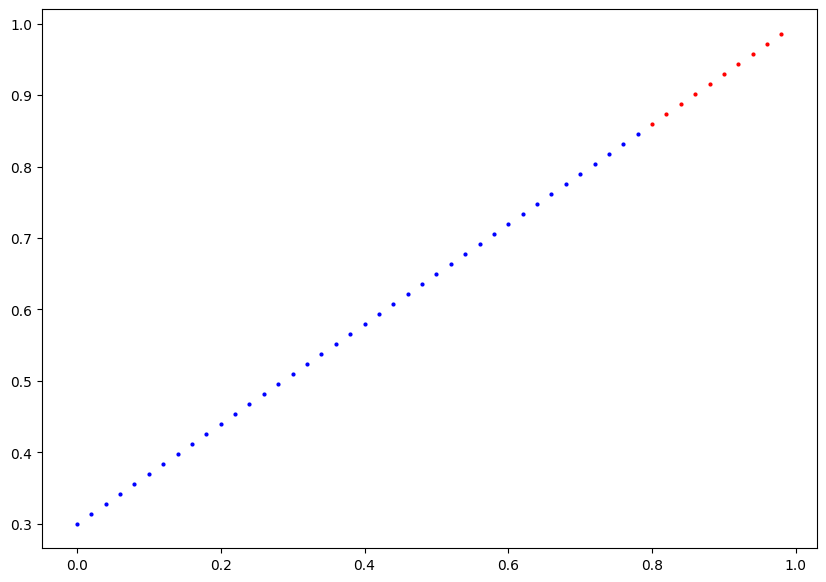

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c="b",s=4, label="x train")
plt.scatter(X_test,y_test, c="r",s=4, label="y train")


In [ ]:
class LinerRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinerRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
X_test, y_pred

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

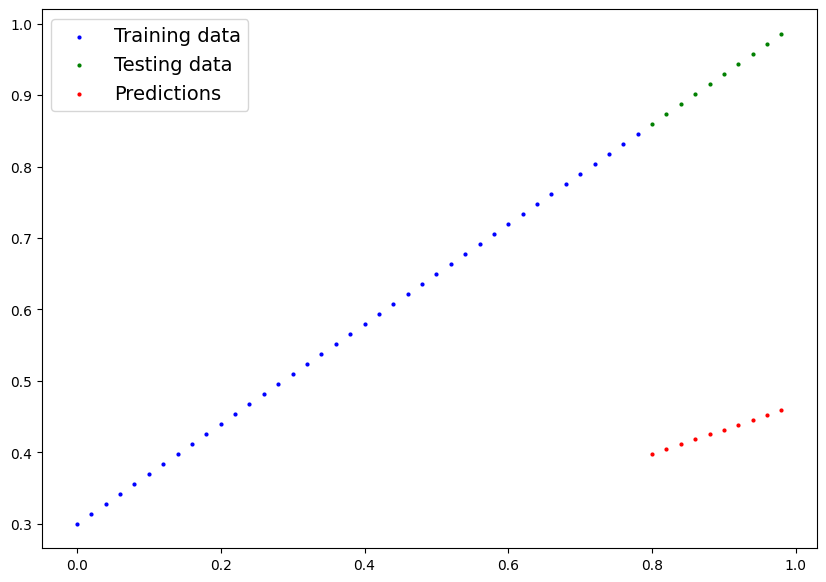

In [ ]:
plot_predictions(predictions=y_pred)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
loss_fn

L1Loss()

In [ ]:
list()

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

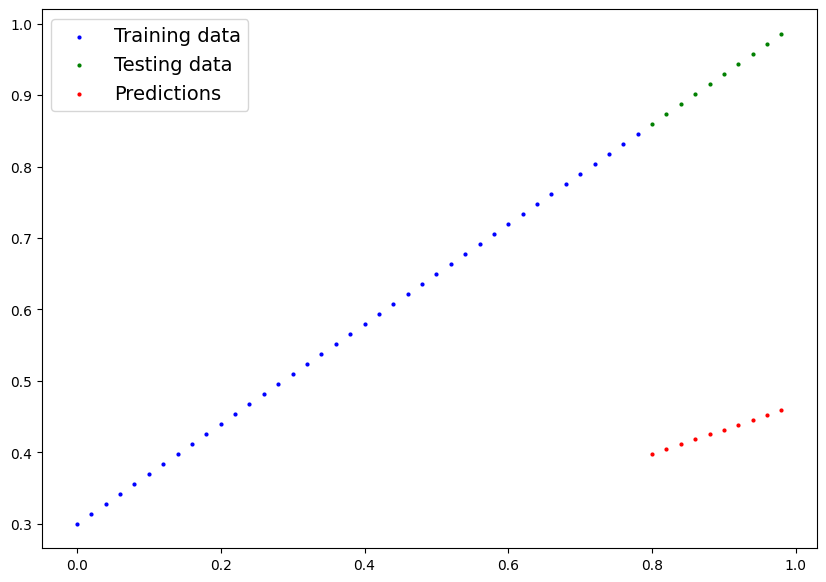

In [ ]:
plot_predictions(predictions=y_pred)

In [ ]:
torch.manual_seed(42)

epochs=1000

## Training
for epoch in range(epochs):
  model_0.train()

  #Forward Pass
  y_pred = model_0(X_train)

  #Loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  #Optimizer
  optimizer.zero_grad()

  #Backpropagation
  loss.backward()

  #Gradient Descent
  optimizer.step()

  model_0.eval()

print(model_0.state_dict())

Loss: 0.02376994863152504
Loss: 0.02342480979859829
Loss: 0.023080935701727867
Loss: 0.022739607840776443
Loss: 0.022391926497220993
Loss: 0.022054409608244896
Loss: 0.02170540764927864
Loss: 0.021366719156503677
Loss: 0.021020207554101944
Loss: 0.020677709951996803
Loss: 0.02033500373363495
Loss: 0.01998869702219963
Loss: 0.019649803638458252
Loss: 0.019300809130072594
Loss: 0.018963487818837166
Loss: 0.01861560344696045
Loss: 0.018274478614330292
Loss: 0.017930403351783752
Loss: 0.01758546568453312
Loss: 0.017245199531316757
Loss: 0.016896454617381096
Loss: 0.01656000316143036
Loss: 0.016210997477173805
Loss: 0.01587124727666378
Loss: 0.015525798313319683
Loss: 0.015182236209511757
Loss: 0.014840595424175262
Loss: 0.01449323259294033
Loss: 0.014155393466353416
Loss: 0.013806397095322609
Loss: 0.013468016870319843
Loss: 0.013121193274855614
Loss: 0.01277900766581297
Loss: 0.012435992248356342
Loss: 0.01208999752998352
Loss: 0.011750795878469944
Loss: 0.011401787400245667
Loss: 0.01106

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

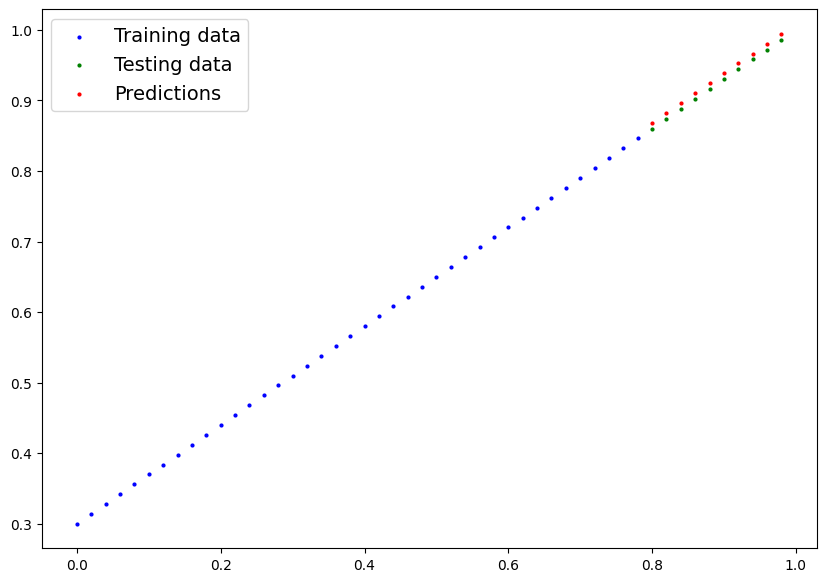

In [ ]:
plot_predictions(predictions=y_pred_new)

In [ ]:
weight, bias

(0.7, 0.3)